In [47]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
dataset = pd.read_csv('/content/marketing_campaign.csv', delimiter='\t')
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [50]:
dataset=dataset.dropna()

In [51]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Pre-processing Data

In [52]:
# calculating the age of customers 
dataset['c_year'] = 2021
dataset['age'] = dataset['c_year']-dataset['Year_Birth']

# calculating the no of days as customers
dataset['c_date'] = '01-01-2015'
dataset['Dt_Customer'] =pd.to_datetime(dataset.Dt_Customer)
dataset['c_date'] = pd.to_datetime(dataset.c_date)
dataset['days_customer'] = (dataset['c_date']-dataset['Dt_Customer']).dt.days

# reducing some dimensions 

# defining two categories of expenses as on food ( fish+meat+ fruit) and as leisure_Expense ( wine, sweet, Gold)
dataset['leisure_Expense'] = dataset['MntWines']+ dataset['MntSweetProducts']+ dataset['MntGoldProds']
dataset['food'] = dataset['MntFishProducts'] + dataset['MntFruits'] + dataset['MntMeatProducts']

# defining accepted_any_cmp if customer have ever taken any campaign offer ( 1- yes, 0-no)
dataset['accepted_any_cmp']= dataset['AcceptedCmp1']+dataset['AcceptedCmp2']+dataset['AcceptedCmp3']+dataset['AcceptedCmp4']+dataset['AcceptedCmp5']+dataset['Response']
dataset['accepted_any_cmp']= np.where(dataset['accepted_any_cmp'] > 0, 1, 0)

# defining martial status as ( 0- single adult, 1- two adults)
mapping = {'Single' : 0, 'Together': 1, 'Married': 1, 'Divorced': 0, 'Widow': 0, 'Alone': 0,
       'Absurd': 0, 'YOLO': 0, 'Graduation': 1, 'PhD': 2, 'Master': 2, 'Basic': 0, '2n Cycle': 2}
dataset=dataset.replace({'Marital_Status': mapping, 'Education': mapping}) 

dataset['kid_teen'] = dataset['Kidhome'] + dataset['Teenhome']
dataset['kid_teen']= np.where(dataset['kid_teen'] > 0, 1, 0)

dataset.columns


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'c_year', 'age', 'c_date', 'days_customer', 'leisure_Expense', 'food',
       'accepted_any_cmp', 'kid_teen'],
      dtype='object')

In [53]:
amount_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

dataset['Total_Spent'] = sum(dataset[col] for col in amount_cols)

In [54]:
quantity_cols = ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']

dataset['Total_Quantity'] = sum(dataset[col] for col in quantity_cols)

In [55]:
promotion_accepted_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2']

dataset['Promotion_Accepted'] = sum(dataset[col] for col in promotion_accepted_cols)

In [56]:
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,c_year,age,c_date,days_customer,leisure_Expense,food,accepted_any_cmp,kid_teen,Total_Spent,Total_Quantity,Promotion_Accepted
0,5524,1957,1,0,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2021,64,2015-01-01,997,811,806,1,0,1617,25,0
1,2174,1954,1,0,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2021,67,2015-01-01,151,18,9,0,1,27,6,0
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2021,56,2015-01-01,498,489,287,0,0,776,21,0
3,6182,1984,1,1,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2021,37,2015-01-01,91,19,34,0,1,53,8,0
4,5324,1981,2,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2021,40,2015-01-01,347,215,207,0,1,422,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2021,54,2015-01-01,567,1074,267,0,1,1341,18,0
2236,4001,1946,2,1,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2021,75,2015-01-01,87,414,30,1,1,444,22,1
2237,7270,1981,1,0,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2021,40,2015-01-01,341,944,297,1,0,1241,19,1
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2021,65,2015-01-01,342,519,324,0,1,843,23,0


Training of Model

In [57]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
dataset1=dataset
dataset1=dataset1.drop(["Promotion_Accepted","Dt_Customer","c_date",'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2'],axis=1)

In [59]:
X = dataset1
Y = dataset["Promotion_Accepted"]

In [60]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [61]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [62]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

Results

In [63]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.89%


Shap Analysis

In [45]:
!pip install shap

     |████████████████████████████████| 371 kB 6.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509239 sha256=0177797e2452ebf7eb347d288ef0fdf861426a8d8109b5f46b487751e5cbe2a4
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


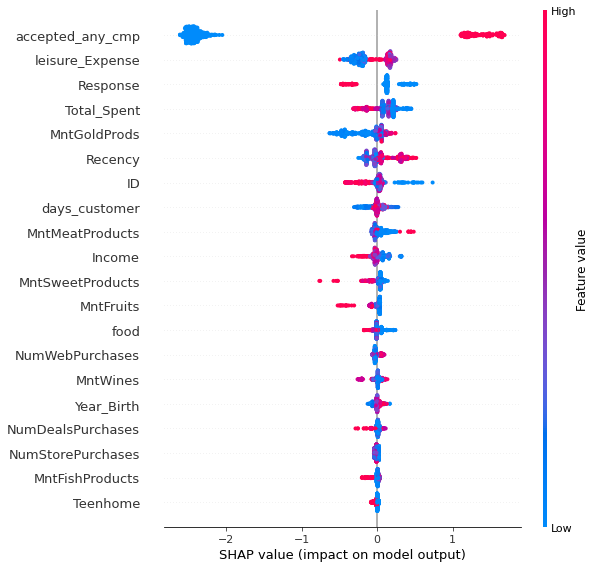

In [64]:
import shap  

explainer = shap.TreeExplainer(model)


shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values[1], X_test)

 Recommendation to business for the next round of campaigns

From the model we can conclude that Teenhome had a very minimal impact on the model. Accepted_cmp was responsible for the output, so we can say that it was directly proportional to the promotions. From this we can see how each feature affects the model, and the importance of each feature.
The business strategy could be based on Response as the model is highly dependent on it. The company can offer promotions based on the response it recieves from its customers. This will help the company identify which customers are actually willing to take up promotions. 